# Desicion Tree Regression

In [5]:
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

sys.path.insert(0, '../src')
import regression_functions_utils as rfu

In [6]:
# def get_rand_rgb_color(col_numb):
#     return [np.random.rand(col_numb)]

In [7]:
# Cars
# http://mlr.cs.umass.edu/ml/machine-learning-databases/autos/
f = "/Users/tarajano/stud/data_analysis_stats_ml_mix/data/autos/imports-85_ready.csv"
dtf = pd.read_csv(f)
print(dtf.shape)

(205, 26)


####  Drop NA records

In [8]:
dtf = dtf.replace({'?': np.nan}).dropna()
print(dtf.shape)

(159, 26)


####  Define numeric and Categorical columns

In [9]:
num_cols = [ 
    'symboling', 'normalized_losses', 'num_of_doors', 'wheel_base', 'length', 'width', 'height', 'curb_weight',
    'num_of_cylinders', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm',
    'city_mpg','highway_mpg', 'price'
]
cat_cols = [
    'make', 'fuel_type', 'aspiration', 'body_style',
    'drive_wheels', 'engine_location', 'engine_type','fuel_system'
]

####  Convert Categorical to Binary

In [10]:
ctg_dtf = rfu.get_dummies(dtf=dtf[cat_cols], categ_cols=cat_cols, avoid_dummy_trap=True)

####  Convert Word to Number

In [11]:
from word2number import w2n

to_num = ['num_of_doors', 'num_of_cylinders']

for c in to_num:
    dtf[c] = [w2n.word_to_num(x) for x in dtf[c].values]

#### Numeric columns only dtf

In [13]:
num_dtf = dtf[num_cols]

In [14]:
print('num_dtf.shape', num_dtf.shape)
print('ctg_dtf.shape', ctg_dtf.shape)

num_dtf.shape (159, 18)
ctg_dtf.shape (159, 34)


#### Cast types

In [15]:
num_dtf = num_dtf.astype(
    {'normalized_losses':'float32', 'bore':'float32', 'stroke':'float32',
     'horsepower': 'int32', 'peak_rpm': 'int32','price': 'float32'}
)

In [21]:
num_dtf = pd.concat([num_dtf, ctg_dtf], axis=1, sort=False)

In [22]:
print(num_dtf.columns)

Index(['symboling', 'normalized_losses', 'num_of_doors', 'wheel_base',
       'length', 'width', 'height', 'curb_weight', 'num_of_cylinders',
       'engine_size',
       ...
       'drive_wheels_fwd', 'engine_type_dohc', 'engine_type_l',
       'engine_type_ohc', 'engine_type_ohcf', 'fuel_system_1bbl',
       'fuel_system_2bbl', 'fuel_system_idi', 'fuel_system_mfi',
       'fuel_system_mpfi'],
      dtype='object', length=154)


#### Scale data

In [23]:
X = num_dtf.drop(['price'], axis=1).copy()
y = num_dtf[['price']].copy()

X_scld = preprocessing.scale(X)
y_scld = preprocessing.scale(y)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int32, int64, float32, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype float32 were all converted to float64 by the scale function.
  """


In [24]:
# plt.hist(y_scld)

#### Features' collinearity 
_Collinearity seems very high among numeric features_

In [ ]:
# vif = rfu.compute_vif(X)
# print(vif)

#### Features' normality

In [213]:
# def normality_test(dtf, alpha=.05):
#     r = pd.DataFrame(columns=['feature', 'sw_stat','p_value','gaussian'])
    
#     for f in dtf.columns:
#         sw_stat, p_value = rfu.shapiro_wilks_test(dtf[f])
#         h0 = 0
#         if p_value > alpha:
#             h0 = 1
#         t = pd.DataFrame({'feature':[f], 'sw_stat':[sw_stat],'p_value':[p_value],'gaussian':[h0]})
#         r = pd.concat([r,t])
# #     r.reset_index(inplace=True)
#     return r

# print(normality_test(X))

In [ ]:
# Plot features' hists
# for i, f in enumerate(X.columns):
#     ax = X[[f]].plot.hist()

#### Split into Train & Test sets

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scld, y_scld, test_size=0.2)

#### Create regressor

In [27]:
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [28]:
y_hat = regressor.predict(X_test)

In [29]:
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print("Coeff. Determination (R2): {}".format(regressor.score(X_train, y_train)))

# The mean squared error
print("Mean Squared Error: {}".format(mean_squared_error(y_test, y_hat)))

# Explained variance score: 1 is perfect prediction
print("Explained Variance Score: {}".format(r2_score(y_test, y_hat)))

Coeff. Determination (R2): 0.9999144575386378
Mean Squared Error: 0.09710144110280745
Explained Variance Score: 0.7503496149750861


#### Plot y_hat vs y_test to inspect regression results

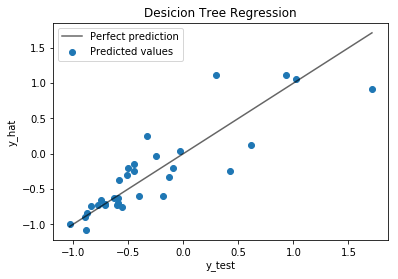

In [30]:
plt.scatter(y_test, y_hat)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', alpha=.6)
plt.legend(['Perfect prediction', 'Predicted values'])
plt.xlabel('y_test')
plt.ylabel('y_hat')
plt.title('Desicion Tree Regression')
plt.show()

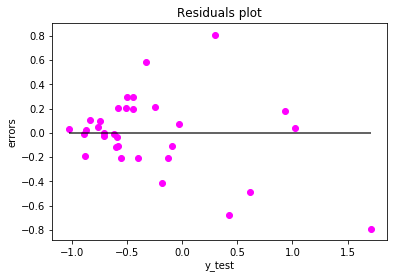

In [61]:
y_hat = y_hat.reshape(-1,1)

plt.scatter(y_test, (y_hat - y_test), color='magenta')
plt.hlines(0, min(y_test), max(y_test), color='black', alpha=.8)
plt.xlabel('y_test')
plt.ylabel('errors')
plt.title('Residuals plot')
plt.show()

#### Preliminary results

* There's larger erros in prodictions as the car prices increases.